# Практическая работа №3: Кластерный анализ
Выполнила студентка гр. 0373 Абзалова Адель. Вариант №1

## Цель работы
Освоение основных понятий и некоторых методов кластерного анализа, в частности, метода k-means и метода поиска сгущений.

## Основные теоретические положения

На практике наиболее распространены следующие методы нормализации признаков:
-Минимакс — линейное преобразование данных в диапазоне [0..1], где минимальное и максимальное масштабируемые значения соответствуют 0 и 1 соответственно; <br>
-Z-масштабирование данных на основе среднего значения и стандартного отклонения: деление разницы между переменной и средним значением на стандартное отклонение; <br>
-десятичное масштабирование путем удаления десятичного разделителя значения переменной. <br>
Нормализация по методу минмакс: <br>
$X_{norm}=\frac{X-X_{min}}{X_{max}-X_{min}}$ <br>
"Грубая" верхняя оценка количества кластеров $\widetilde{k}$ <br>
$\widetilde{k}=\lfloor\sqrt{n/2}\rfloor$ <br>
Метод k-средних используется для кластеризации данных на основе алгоритма разбиения векторного пространства на заранее определенное число кластеров k. Алгоритм представляет собой итерационную процедуру, в которой выполняются следующие шаги:<br>
1.Выбирается число кластеров k.<br>
2.Из исходного множества данных случайным образом выбираются k наблюдений, которые будут служить начальными центрами кластеров. <br>
3.Для каждого наблюдения исходного множества определяется ближайший к нему центр кластера (расстояния измеряются в метрике Евклида). При этом записи, «притянутые» определенным центром, образуют начальные кластеры. <br>
4.Вычисляются центроиды — центры тяжести кластеров. Каждый центроид — это вектор, элементы которого представляют собой средние значения соответствующих признаков, вычисленные по всем записям кластера. <br>
5.Центр кластера смещается в его центроид, после чего центроид становится центром нового кластера. <br>
6.3-й и 4-й шаги итеративно повторяются. Очевидно, что на каждой итерации происходит изменение границ кластеров и смещение их центров. В результате минимизируется расстояние между элементами внутри кластеров и увеличиваются междукластерные расстояния.<br>
Остановка алгоритма производится тогда, когда границы кластеров и расположения центроидов не перестанут изменяться от итерации к итерации, т.е. на каждой итерации в каждом кластере будет оставаться один и тот же набор наблюдений. На практике алгоритм обычно находит набор стабильных кластеров за несколько десятков итераций. <br>
Метод k k-медиан — вариация метода k-средних для задач кластеризации, где для определения центроида кластера вместо среднего вычисляется медиана.<br>
Евклидово расстояние: $d(x,y)=\sqrt{\sum_{i=1}^{n}{(x_{i}-y_{i})}^{2}}$ <br>
Расстояние городских кварталов (Манхэттенское расстояние): $d(x,y)=\sum_{i=1}^{n}{|x_{i}-y_{i}|}$ <br>
Коэффициент силуэта вычисляется с помощью внутрикластерного расстояния (a) и среднего расстояния до ближайшего кластера (b) по каждому кластеру: <br>
$s_{i}=\frac{b_{i}-a_{i}}{max(a_{i};b_{i})}$ <br>
где $a_{i}=\frac{1}{\#C_{j}-1}\sum_{x_{j} \in C_{j}}{d(x_{j},x_{C_{j}})} $ <br>
$b_i=min_{j \ne i}\frac{1}{\#C_i}\sum_{x_i \in C_i}{d(x_j, x_{C_{i}})}$ <br>
FOREL (Формальный Элемент) — алгоритм кластеризации, основанный на идее объединения в один кластер объектов в областях их наибольшего сгущения <br>
Алгоритм: <br>
1.Случайно выбираем текущий объект из выборки; <br>
2.Помечаем объекты выборки, находящиеся на расстоянии менее, чем R от текущего; <br>
3.Вычисляем их центр тяжести, помечаем этот центр как новый текущий объект; <br>
4.Повторяем шаги 2-3, пока новый текущий объект не совпадет с прежним; <br>
5.Помечаем объекты внутри сферы радиуса R вокруг текущего объекта как кластеризованные, выкидываем их из выборки;<br>
6.Повторяем шаги 1-5, пока не будет кластеризована вся выборка. <br>


## Постановка задачи
Дано конечное множество из объектов, представленных двумя признаками (в качестве этого множества принимаем исходную двумерную выборку, сформированную ранее в практической работе №2). Выполнить разбиение исходного множества объектов на конечное число подмножеств(кластеров) с использованием метода k-means и метода поиска сгущений. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

In [163]:
import math
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable

1. Нормализовать множество точек из предыдущей работы, отобразить полученное множество.

Нормализованные точки по х: [0.051470588235294115, 0.18382352941176472, 0.04779411764705882, 0.03676470588235294, 0.04411764705882353, 0.25735294117647056, 0.022058823529411766, 0.08088235294117647, 0.04411764705882353, 0.2647058823529412, 0.022058823529411766, 0.0, 0.5625, 0.08088235294117647, 0.20220588235294118, 0.011029411764705883, 0.16544117647058823, 0.22058823529411764, 0.003676470588235294, 0.1323529411764706, 0.03308823529411765, 0.011029411764705883, 0.01838235294117647, 0.35661764705882354, 0.0661764705882353, 0.0, 0.0, 0.29044117647058826, 0.05514705882352941, 0.08823529411764706, 0.13602941176470587, 0.003676470588235294, 0.003676470588235294, 0.04044117647058824, 0.13602941176470587, 0.9338235294117647, 0.1213235294117647, 0.1213235294117647, 0.11764705882352941, 0.022058823529411766, 0.003676470588235294, 0.04044117647058824, 0.011029411764705883, 0.014705882352941176, 0.0, 0.011029411764705883, 0.014705882352941176, 0.025735294117647058, 0.007352941176470588, 0.0441176

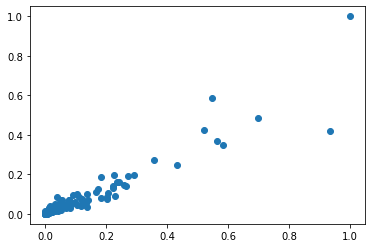

In [164]:
sample1=([14,50,13,10,12,70,6,22,12,72,6,0,153,22,55,3,45,60,1,36,9,3,5,97,18,0,0,79,15,24,37,1,1,11,37,254,33,33,32,6,1,11,3,4,0,3,4,7,2,12,8,0,14,0,10,9,1,23,12,66,118,24,14,17,1,38,74,62,14,3,60,55,0,3,142,9,14,4,25,4,10,28,10,33,26,5,10,56,10,50,5,149,4,3,272,190,30,21,64,28,2,13,1,21,47,9,11,159,21,8,4,61,17,7,5])
sample2=([88,152,89,65,79,278,53,91,77,271,23,8,709,60,141,8,210,271,30,111,102,55,44,526,62,5,2,380,132,105,192,31,9,40,65,807,127,86,76,17,9,33,12,80,2,62,60,33,30,81,50,1,64,5,165,32,5,93,62,311,477,104,41,70,5,138,372,177,84,24,251,167,28,28,811,82,122,56,180,28,65,91,84,144,121,36,48,202,48,356,26,1130,48,28,1920,933,168,136,310,190,12,136,4,107,242,80,51,671,138,31,57,378,97,31,51])
norm_sample1=[]
norm_sample2=[]
n=len(sample1)
for i in range(0,n):
    norm_sample1.append((sample1[i]-min(sample1))/(max(sample1)-min(sample1)))
    norm_sample2.append((sample2[i]-min(sample2))/(max(sample2)-min(sample2)))
print('Нормализованные точки по х:',norm_sample1)
print('Нормализованные точки по у:',norm_sample2)
plt.scatter(norm_sample1, norm_sample2)
plt.show()

2. Определить «грубую» верхнюю оценку количества кластеров $\widetilde{k}$

In [165]:
k=math.floor(math.sqrt(n/2))
print('грубая верхняя оценка количества кластеров: ', k)

грубая верхняя оценка количества кластеров:  7


3. Реализовать алгоритм k-means. Отобразить полученные кластеры,каждый кластер выделить разным цветом или маркером, отметить центроиды.

In [166]:
def KMeans(k, n):
    a=True
    clust={}
    center={}
    for i in range(k):
        center[i]=[norm_sample1[i], norm_sample2[i]]
    while a: 
        center1={}
        for i in range(k):
            center1[i]=0
            clust[i]=[]
        min_j=10
        for i in range(0,n):
            min_dist=[]
            for j in range(k):
                min_dist.append(np.sqrt((norm_sample1[i]-center[j][0])**2+(norm_sample2[i]-center[j][1])**2))
            min_j=min_dist.index(min(min_dist))
            clust[min_j].append([norm_sample1[i], norm_sample2[i]])
        for j in range(k):
            if len(clust[j])==0:
                center1[j]=center[j]
            else:
                center1[j]=[np.mean(np.array(clust[j])[:,0]),np.mean(np.array(clust[j])[:,1])]
            if center1==center:
                a=False
        center=center1
    str_center=''
    str_lencl=''
    for i in range(k):
        center[i][0]=round(center[i][0],3)
        center[i][1]=round(center[i][1],3)
        str_lencl+=f'{i+1}:{len(clust[i])}\n'
        str_center+=f'{i+1}:({center[i][0]},{center[i][1]})\n'
    return clust, center, str_center,str_lencl


In [167]:
def displGraph(k,n, clust,center):
    colors=['red','blue','cyan', 'magenta', 'black', 'orange', 'green', 'purple']
    plt.figure(figsize=(10,10))
    for j in range(k):
        for i in range(len(clust[j])):
            plt.scatter(clust[j][i][0],clust[j][i][1], c=colors[j],alpha=0.3)
        plt.scatter(center[j][0],center[j][1], c=colors[j], s=150)

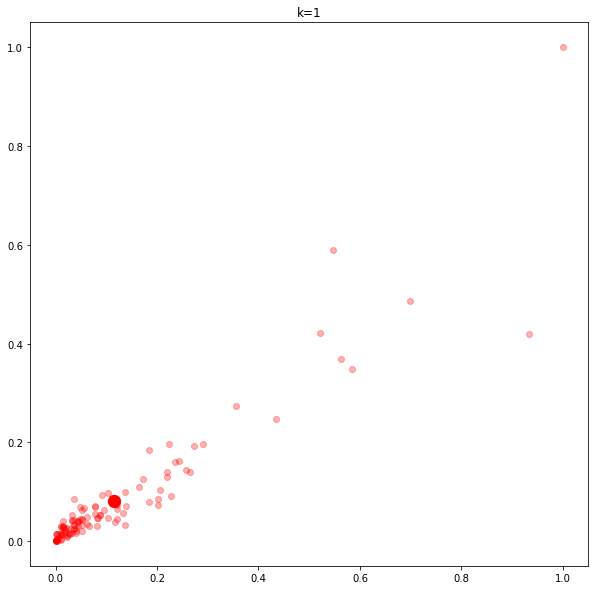

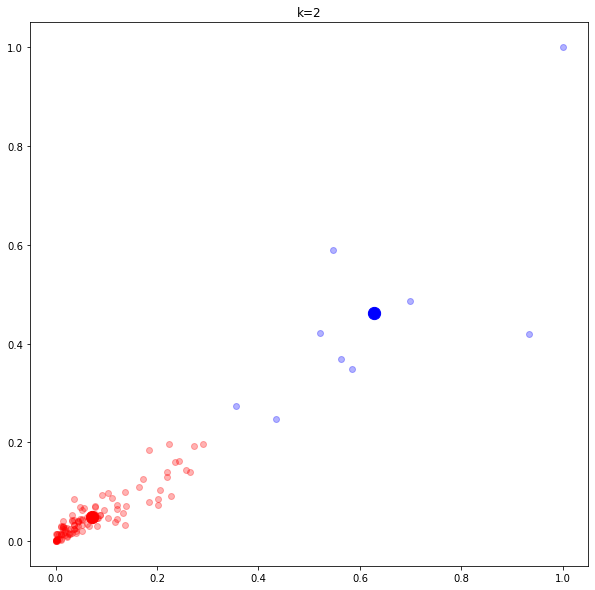

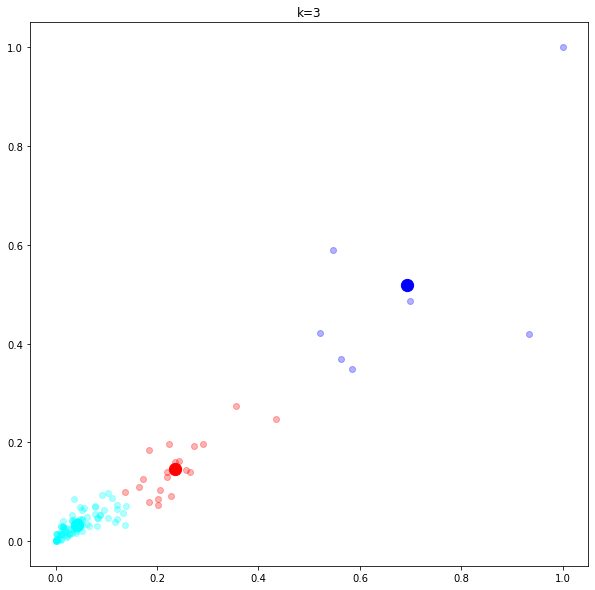

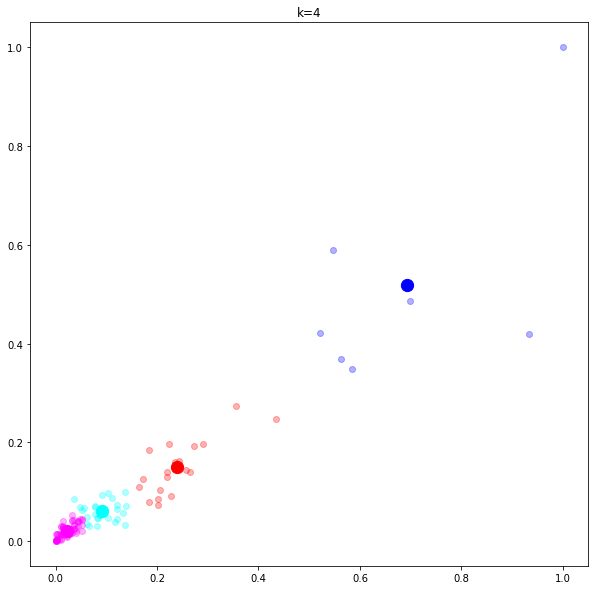

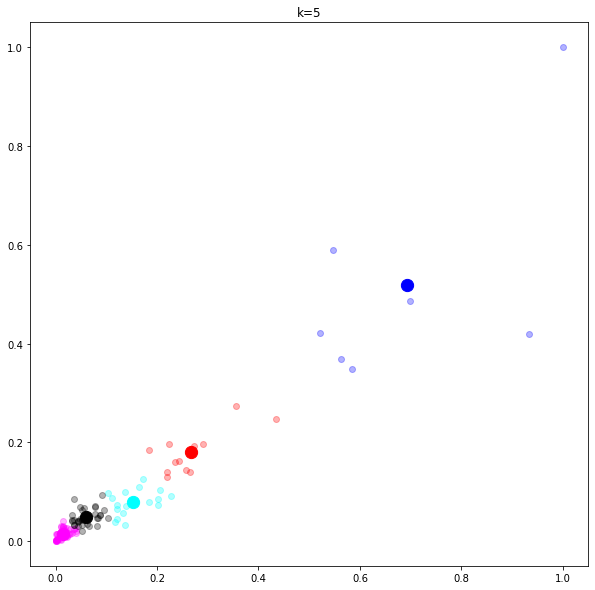

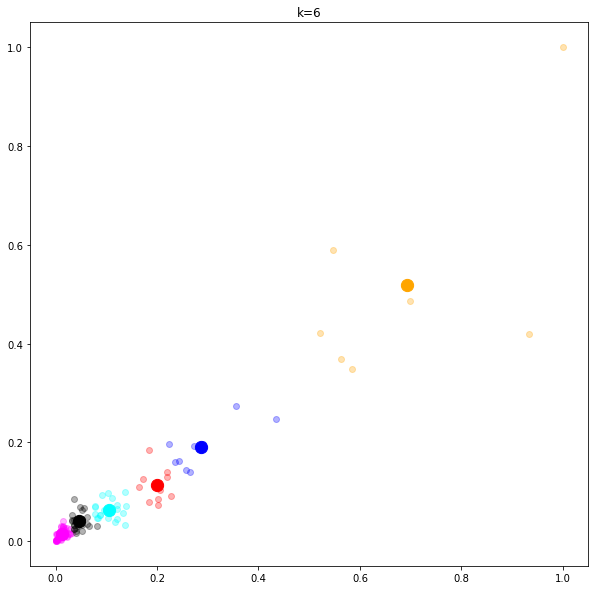

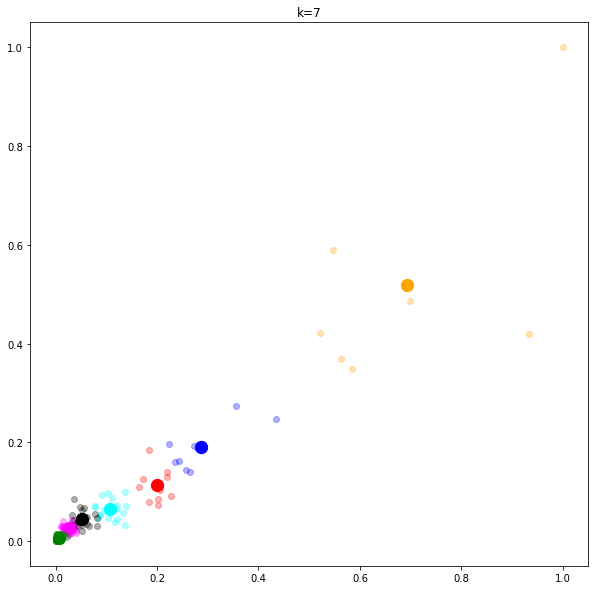

In [168]:
for i in range(1,k+1):
    f=KMeans(i,n)
    displGraph(i,n, f[0],f[1])
    plt.title(f'k={i}')

4. Реализовать алгоритмы k-medians (для нечётных вариантов) и k-medoids (для чётных вариантов). Отобразить полученные кластеры, каждый кластер выделить разным цветом или маркером, отметить центроиды.

In [170]:
def KMedians(k, n):
    a=True
    clust={}
    center={}
    for i in range(k):
        center[i]=[norm_sample1[i], norm_sample2[i]]
    while a: 
        center1={}
        for i in range(k):
            center1[i]=0
            clust[i]=[]
        min_j=10
        for i in range(0,n):
            min_dist=[]
            for j in range(k):
                min_dist.append(abs(norm_sample1[i]-center[j][0])+abs(norm_sample2[i]-center[j][1]))
            min_j=min_dist.index(min(min_dist))
            clust[min_j].append([norm_sample1[i], norm_sample2[i]])
        for j in range(k):
            if len(clust[j])==0:
                center1[j]=center[j]
            else:
                center1[j]=[np.median(np.array(clust[j])[:,0]),np.median(np.array(clust[j])[:,1])]
            if center1==center:
                a=False
        center=center1
    str_center=''
    str_lencl=''
    for i in range(k):
        center[i][0]=round(center[i][0],3)
        center[i][1]=round(center[i][1],3)
        str_lencl+=f'{i+1}:{len(clust[i])}\n'
        str_center+=f'{i+1}:({center[i][0]},{center[i][1]})\n'
    return clust, center, str_center,str_lencl

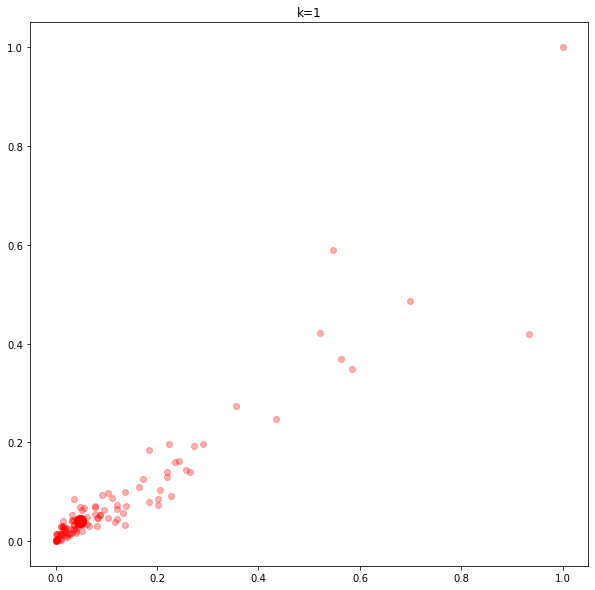

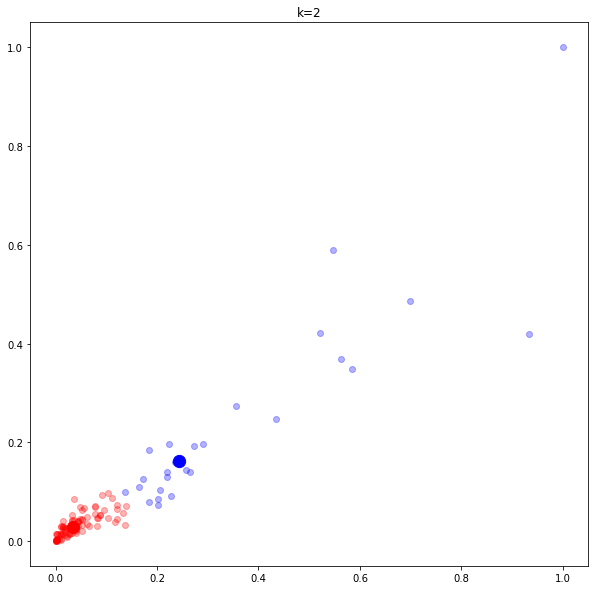

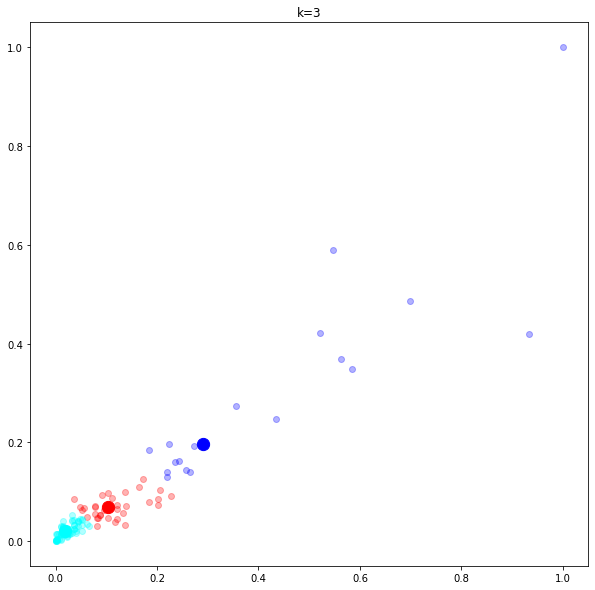

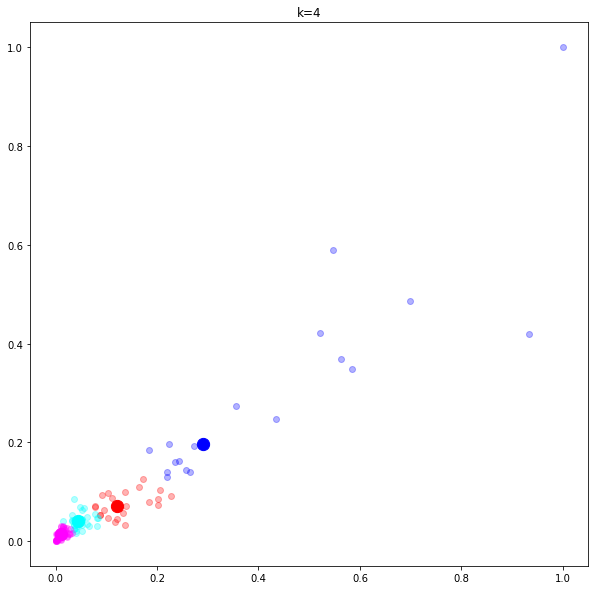

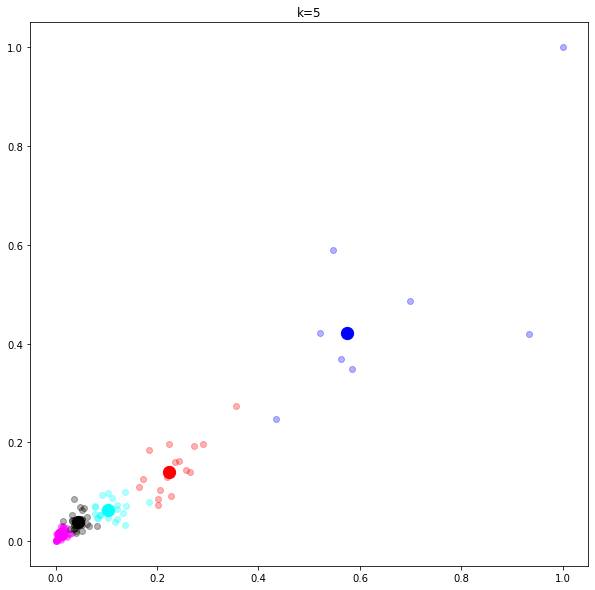

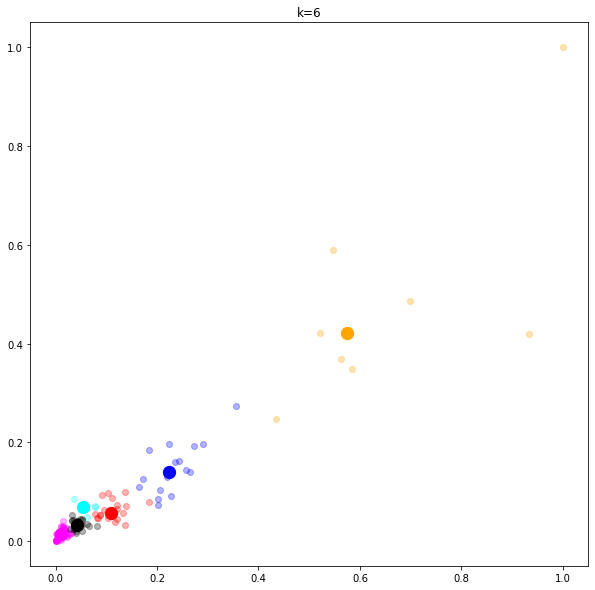

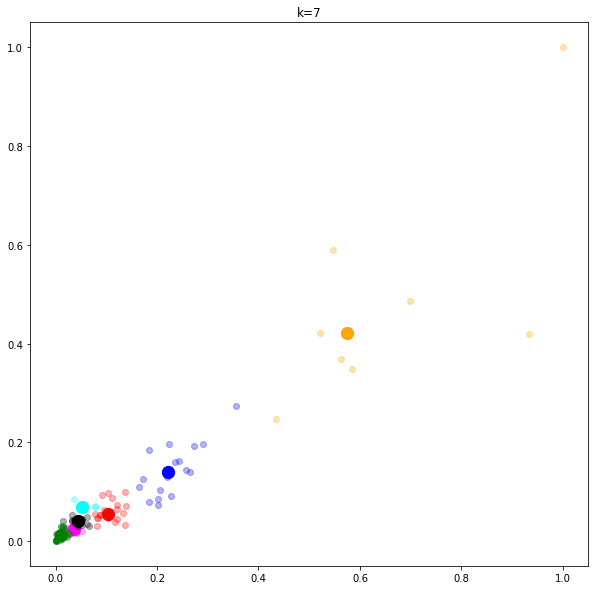

In [171]:
for i in range(1,k+1):
    g=KMedians(i,n)
    displGraph(i,n, g[0],g[1])
    plt.title(f'k={i}')

5. Для каждого метода заполнить следующую таблицу, где значения 𝑘 изменяются от 1 до $\widetilde{k}$:

In [173]:
table1=PrettyTable()
table2=PrettyTable()
table1.add_column('Значение k',[1,2,3,4,5,6,7])
table2.add_column('Значение k',[1,2,3,4,5,6,7])
arr,arr2,arr3,arr4=[],[],[],[]
for i in range(1,k+1):
    arr.append(KMeans(i,n)[2])
    arr2.append(KMeans(i,n)[3])
    arr3.append(KMedians(i,n)[2])
    arr4.append(KMedians(i,n)[3])
table1.add_column('Центроиды кластера x_Ci',arr)
table1.add_column('Объем кластера #C_i', arr2)
table2.add_column('Центроиды кластера x_Ci',arr3)
table2.add_column('Объем кластера #C_i', arr4)
print('Метод k-means\n',table1)
print('Метод k-medians\n',table2)

Метод k-means
 +------------+-------------------------+---------------------+
| Значение k | Центроиды кластера x_Ci | Объем кластера #C_i |
+------------+-------------------------+---------------------+
|     1      |     1:(0.116,0.082)     |        1:115        |
|            |                         |                     |
|     2      |      1:(0.072,0.05)     |        1:106        |
|            |     2:(0.627,0.462)     |         2:9         |
|            |                         |                     |
|     3      |     1:(0.235,0.147)     |         1:20        |
|            |     2:(0.693,0.519)     |         2:7         |
|            |     3:(0.043,0.033)     |         3:88        |
|            |                         |                     |
|     4      |      1:(0.24,0.15)      |         1:19        |
|            |     2:(0.693,0.519)     |         2:7         |
|            |     3:(0.092,0.061)     |         3:28        |
|            |     4:(0.022,0.021)     |

6. С помощью метода силуэтов (для нечётных вариантов) и метода локтя (для чётных вариантов) выявить для каждого метода оптимальное количество кластеров.

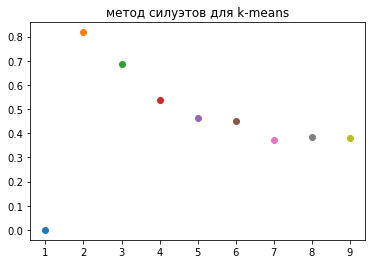

In [176]:
plt.scatter(1,0)
for i in range(2,10):
    arr_a=[]
    arr_b=[]
    s=[]
    a=0
    c=KMeans(i,n)
    c=c[0]
    for j in range(i):
        for k in range(len(c[j])):
            arr_bi=[]
            a=0
            for l in range(len(c[j])):
                if k!=l:
                    a+=np.sqrt((c[j][k][0]-c[j][l][0])**2+(c[j][k][1]-c[j][l][1])**2)
            arr_a.append(a/(len(c[j])-1))
            
            if i==1:
                arr_b.append(0)
            else:
                for m in range(i):
                    if j!=m:
                        b=0
                        for p in range(len(c[m])):
                            b+=np.sqrt((c[j][k][0]-c[m][p][0])**2+(c[j][k][1]-c[m][p][1])**2)
                        arr_bi.append(b/len(c[m]))
            
                arr_b.append(min(arr_bi))
    s_mid=0
    for q in range(n):
        s_mid+=(arr_b[q]-arr_a[q])/max(arr_b[q],arr_a[q])
    plt.scatter(i,s_mid/n)
    plt.title('метод силуэтов для k-means')

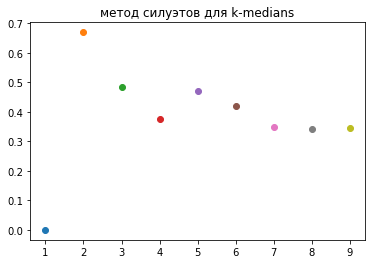

In [177]:
plt.scatter(1,0)
for i in range(2,10):
    arr_a=[]
    arr_b=[]
    s=[]
    a=0
    c=KMedians(i,n)
    c=c[0]
    for j in range(i):
        for k in range(len(c[j])):
            arr_bi=[]
            a=0
            for l in range(len(c[j])):
                if k!=l:
                    a+=abs(c[j][k][0]-c[j][l][0])+abs(c[j][k][1]-c[j][l][1])
            arr_a.append(a/(len(c[j])-1))
            
            if i==1:
                arr_b.append(0)
            else:
                for m in range(i):
                    if j!=m:
                        b=0
                        for p in range(len(c[m])):
                            b+=abs(c[j][k][0]-c[m][p][0])+abs(c[j][k][1]-c[m][p][1])
                        arr_bi.append(b/len(c[m]))
            
                arr_b.append(min(arr_bi))
    s_mid=0
    for q in range(n):
        s_mid+=(arr_b[q]-arr_a[q])/max(arr_b[q],arr_a[q])
    plt.scatter(i,s_mid/n)
    plt.title('метод силуэтов для k-medians')

Для обоих методов оптимальное количество кластеров=2

7. Реализовать алгоритм поиска сгущений при различных радиусах 𝑅, отобразить полученные кластеры, выделить каждый кластер
разным цветом или маркером, отметить центроиды. Результаты представить в виде таблицы:

In [179]:
Rmax=-1
Rmin=1000
for i in range(n):
    for j in range(i+1, n):
        d=np.sqrt((norm_sample1[i]-norm_sample1[j])**2+(norm_sample2[i]-norm_sample2[j])**2)
        if  d>0:
            if d<Rmin:
                Rmin=d
            if d>Rmax:
                Rmax=d
h=(Rmax-Rmin)/9

Т.к. $R_{min} < R < R_{max}$, были взяты 8 равноотстоящих точек, лежащих в этом интервале

In [180]:
def forel(R):
    U=[]
    for i in range(n):
        U.append([norm_sample1[i], norm_sample2[i]])
    cluster_counter=0
    K={}
    centers={}
    b=0
    while(len(U)>0):
        a=True
        xc=[U[0][0], U[0][1]]
        while a:
            x,y=0,0
            xc1=xc
            K[cluster_counter]=[]
            for i in range(len(U)):
                if np.sqrt((xc[0]-U[i][0])**2+(xc[1]-U[i][1])**2)<=R:
                    K[cluster_counter].append([U[i][0],U[i][1]])
                    x+=U[i][0]
                    y+=U[i][1]
            xc=[1/(len(K[cluster_counter]))*x,1/len(K[cluster_counter])*y]
            if xc==xc1:
                centers[cluster_counter]=xc
                a=False
                cluster_counter+=1
        for i in K[cluster_counter-1]:
            if i in U:
                U.remove(i)
    str_center=''
    str_lencl=''
    for i in range(cluster_counter):
        centers[i][0]=round(centers[i][0],3)
        centers[i][1]=round(centers[i][1],3)
        str_lencl+=f'{i+1}:{len(K[i])}\n'
        str_center+=f'{i+1}:({centers[i][0]},{centers[i][1]})\n'
    return K, centers, cluster_counter,  str_center, str_lencl

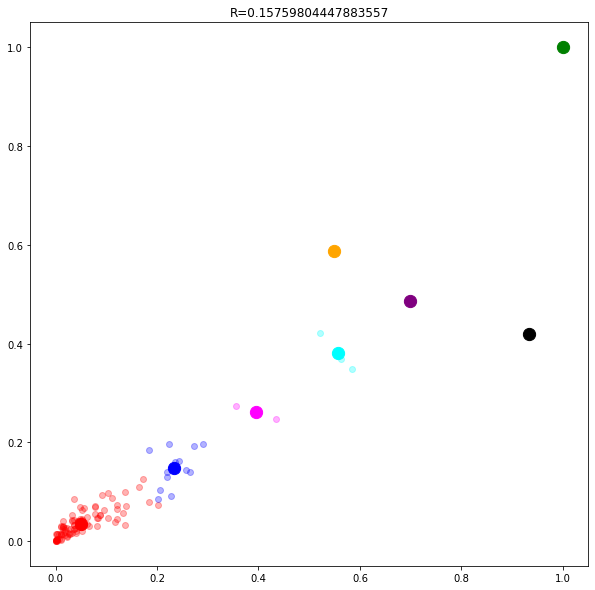

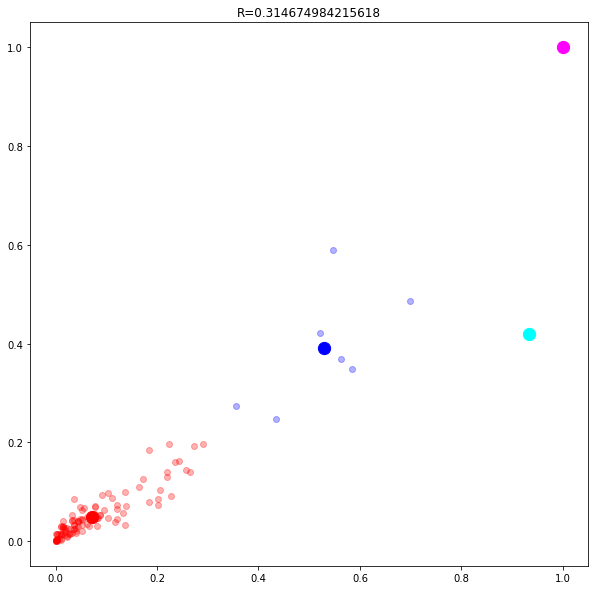

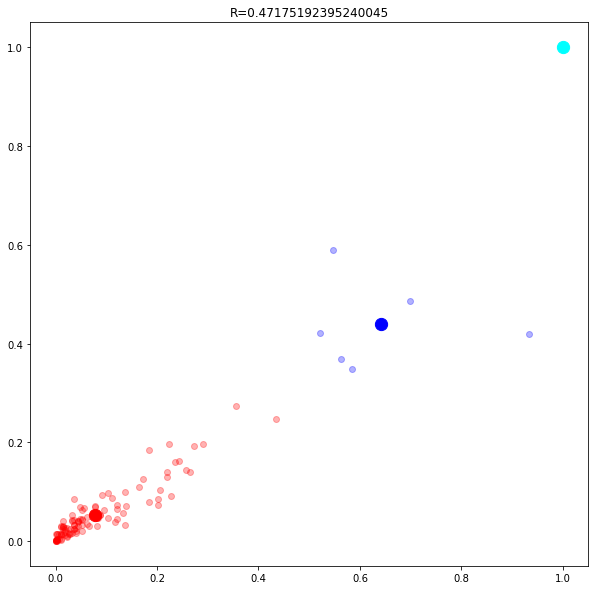

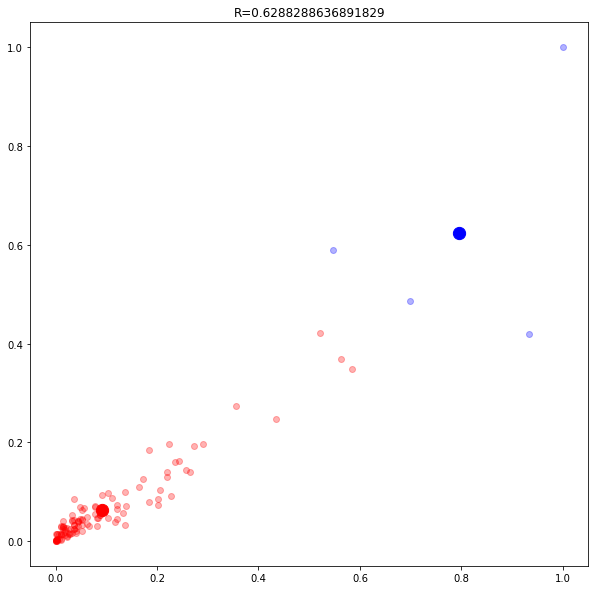

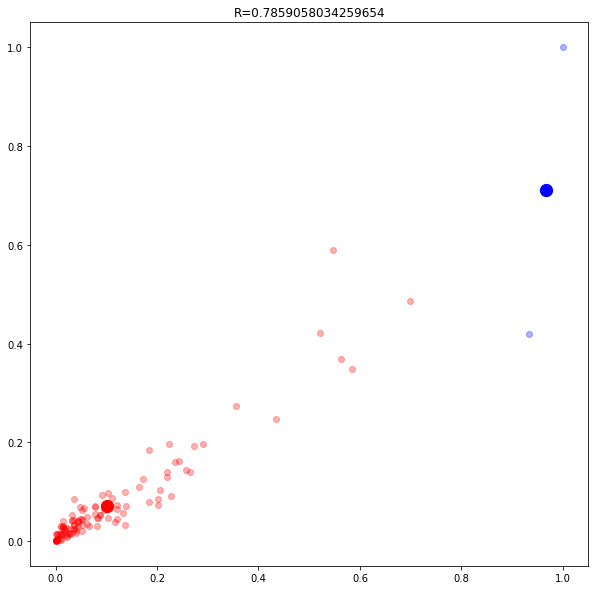

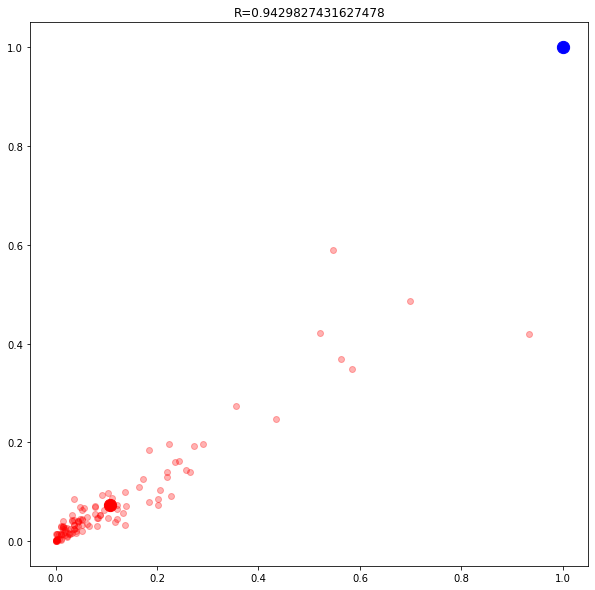

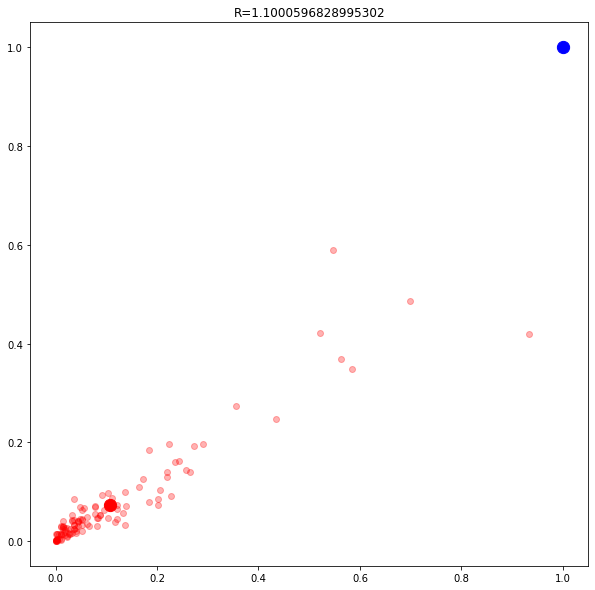

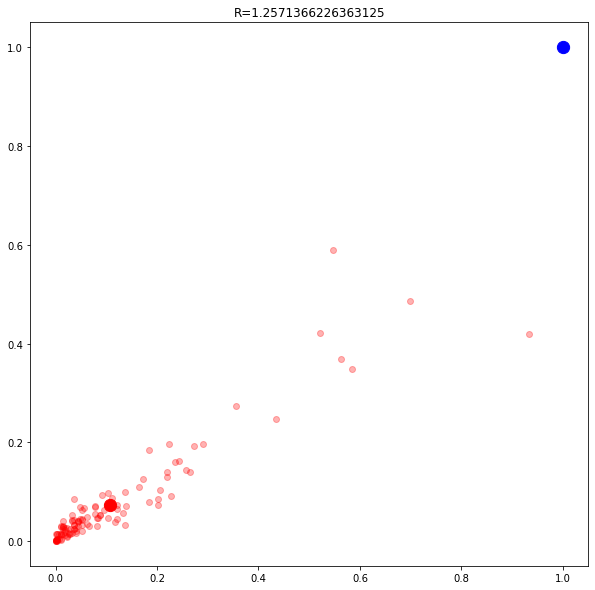

In [203]:
arr_R=[]
R=Rmin+h
arr_centers, arr_len=[],[]
while Rmax-R>0.0000001:
    f=forel(R)
    displGraph(f[2],n,f[0],f[1])
    plt.title(f'R={R}')
    arr_R.append(R)
    arr_centers.append(f[3])
    arr_len.append(f[4])
    R+=h


In [202]:
table3=PrettyTable()
table3.add_column('Значение R',arr_R)
table3.add_column('Центроиды кластера x_Ci',arr_centers)
table3.add_column('Объем кластера #C_i', arr_len)
print(table3)

+---------------------+-------------------------+---------------------+
|      Значение R     | Центроиды кластера x_Ci | Объем кластера #C_i |
+---------------------+-------------------------+---------------------+
| 0.15759804447883557 |      1:(0.05,0.036)     |         1:93        |
|                     |     2:(0.234,0.149)     |         2:13        |
|                     |      3:(0.556,0.38)     |         3:3         |
|                     |     4:(0.395,0.261)     |         4:2         |
|                     |      5:(0.934,0.42)     |         5:1         |
|                     |     6:(0.548,0.588)     |         6:1         |
|                     |       7:(1.0,1.0)       |         7:1         |
|                     |     8:(0.699,0.486)     |         8:1         |
|                     |                         |                     |
|  0.314674984215618  |      1:(0.072,0.05)     |        1:106        |
|                     |     2:(0.529,0.391)     |         2:7   

8. Проверить чувствительность метода поиска сгущений к погрешностям. Сделать выводы.

In [204]:
arr_R=[]
R=Rmin+h+0.001
arr_centers, arr_len=[],[]
while Rmax-R>0.00000001:
    f=forel(R)
    arr_R.append(R)
    arr_centers.append(f[3])
    arr_len.append(f[4])
    R+=h
table4=PrettyTable()
table4.add_column('Значение R',arr_R)
table4.add_column('Центроиды кластера x_Ci',arr_centers)
table4.add_column('Объем кластера #C_i', arr_len)
print(table4)

+---------------------+-------------------------+---------------------+
|      Значение R     | Центроиды кластера x_Ci | Объем кластера #C_i |
+---------------------+-------------------------+---------------------+
| 0.15859804447883558 |      1:(0.05,0.036)     |         1:93        |
|                     |     2:(0.234,0.149)     |         2:13        |
|                     |      3:(0.556,0.38)     |         3:3         |
|                     |     4:(0.395,0.261)     |         4:2         |
|                     |      5:(0.934,0.42)     |         5:1         |
|                     |     6:(0.548,0.588)     |         6:1         |
|                     |       7:(1.0,1.0)       |         7:1         |
|                     |     8:(0.699,0.486)     |         8:1         |
|                     |                         |                     |
|  0.315674984215618  |      1:(0.072,0.05)     |        1:106        |
|                     |     2:(0.529,0.391)     |         2:7   

По таблицам видно, что метод поиска сгущений не чувствителен к погрешностям. Центроиды кластеров и объемы кластеров при увеличении R на 0.001 не изменились

9. Сравнить методы. Сделать выводы.

При использовании метода силуэтов было определено, что оптимальное количество кластеров=2. По таблице метода поиска сгущений при R, лежащем в промежутке $R_{min}<R<R_{max}$ видно, что большее количество раз встречается разделение именно на 2 кластера.

## Выводы

В ходе практической работы было выполнено разбиение исходного множества объектов на конечное число подмножеств(кластеров) с использованием метода k-means, k-medians.С помощью метода силуэтов для каждого метода было выявлено оптимальное количество кластеров. Был реализован алгоритм поиска сгущений при различных радиусах 𝑅. Была проверена чувствительность метода поиска сгущений к погрешностям. 